In [37]:
target_contracts = [c.lower().strip() for c in input("Target Contracts: ").split(",")]
consumer_contracts = [c.lower().strip() for c in input("Consumer Contracts: ").split(",")]

Target Contracts:  0x16b9a82891338f9bA80E2D6970FddA79D1eb0daE,0xa361433E409Adac1f87CDF133127585F8a93c67d
Consumer Contracts:  0x34Bd6Dba456Bc31c2b3393e499fa10bED32a9370


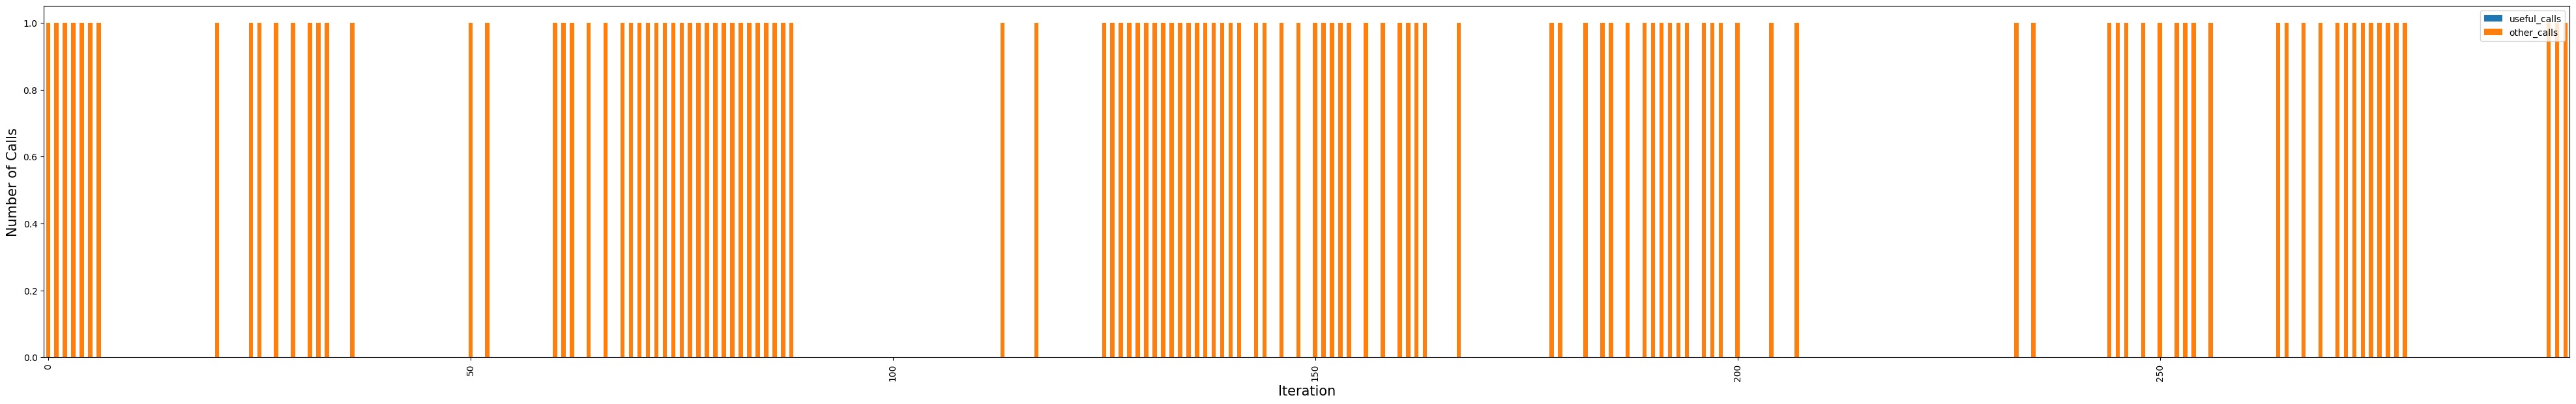

In [182]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

contract_data = {'useful_calls':[], 'other_calls':[]}
contract_secs = []


for i in range(1, 300):
    with open('./work_dir/traces/' + str(i) + '.json') as f:
        target_contracts_set = set(target_contracts)
        consumer_contracts_set = set(consumer_contracts)
        data = json.load(f)["data"]
        total_calls = 0
        useful_calls = 0
        index = 0
        while index < len(data) - 1:
            # layer = 0 includes FirstLevelCall and Logging Events: https://medium.com/mycrypto/understanding-event-logs-on-the-ethereum-blockchain-f4ae7ba50378
            # It is more accurate to count only FirstLevelCall as intentional input
            # This is still not optimal -- many mutations that don't add interesting states are not logged
            if data[index][1]['call_type'] != "FirstLevelCall":
                index += 1
                continue
            current_call = data[index][1]["contract"]
            total_calls += 1
            if current_call in target_contracts_set:
                target_contracts_set.remove(current_call)
            if len(target_contracts_set) == 0:
                useful_calls += 1
            index += 1
        contract_data['useful_calls'].append(useful_calls)
        contract_data['other_calls'].append(total_calls - useful_calls)

df = pd.DataFrame(data = contract_data)
ax = df.plot.bar(stacked=True, figsize=(50, 7))
loc = plticker.MultipleLocator(base = 50) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Number of Calls", fontsize=15)
plt.show()

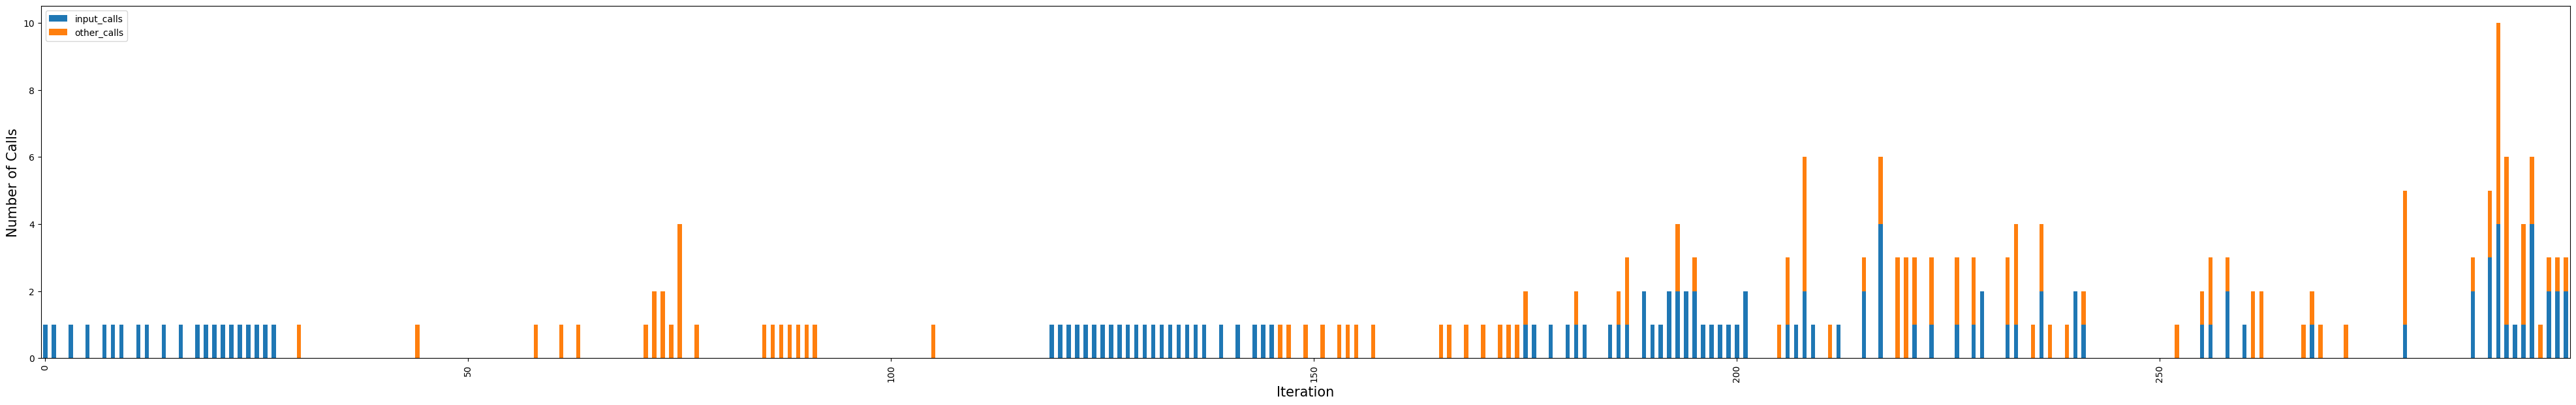

In [180]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

target_contracts_set = set(target_contracts)
consumer_contracts_set = set(consumer_contracts)
contract_data = {'input_calls':[], 'other_calls':[]}

for i in range(1, 300):
    with open('./edg_finance_results_time_stamped/traces/' + str(i) + '.json') as f:
        data = json.load(f)["data"]
        total_calls = 0
        input_calls = 0
        index = 0
        while index < len(data) - 1:
            if data[index][1]['call_type'] != "FirstLevelCall":
                index += 1
                continue
            current_call = data[index][1]["contract"]
            current_caller = data[index][1]["caller"]
            total_calls += 1
            if current_call in target_contracts_set or current_call in consumer_contracts_set:
                input_calls += 1
            index += 1
        contract_data['input_calls'].append(input_calls)
        contract_data['other_calls'].append(total_calls - input_calls)

df = pd.DataFrame(data = contract_data)
ax = df.plot.bar(stacked=True, figsize=(50, 7))
loc = plticker.MultipleLocator(base = 50) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Number of Calls", fontsize=15)
plt.show()

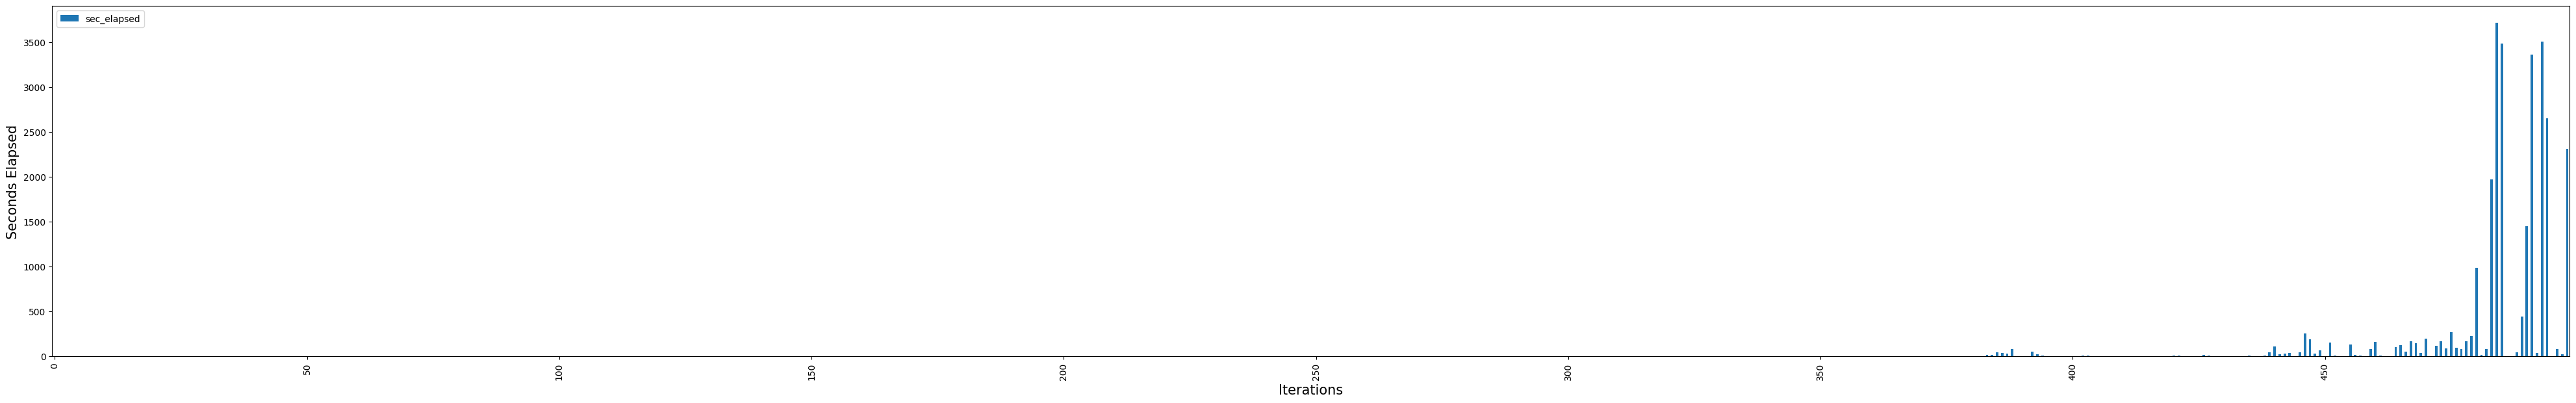

In [149]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

contract_data = {'sec_elapsed': []}
prev_sec_elapsed = 0

for i in range(1, 500):
    with open('./edg_finance_results_time_stamped/traces/' + str(i) + '.json') as f:
        target_contracts_set = set(target_contracts)
        consumer_contracts_set = set(consumer_contracts)
        data = json.load(f)["data"]
        total_calls = len(data)
        useful_calls = 0
        index = 0
        while index < total_calls - 1:
            sec_elapsed = data[index][1]["sec_elapsed"]
            if len(target_contracts_set) == 0:
                useful_calls = total_calls - index
                break
            index += 1
        contract_data['sec_elapsed'].append(sec_elapsed - prev_sec_elapsed)
        prev_sec_elapsed = sec_elapsed

df = pd.DataFrame(data = contract_data)
ax = df.plot.bar(stacked=True, figsize=(50, 7))
loc = plticker.MultipleLocator(base = 50) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xlabel("Iterations", fontsize=15)
plt.ylabel("Seconds Elapsed", fontsize=15)
plt.show()

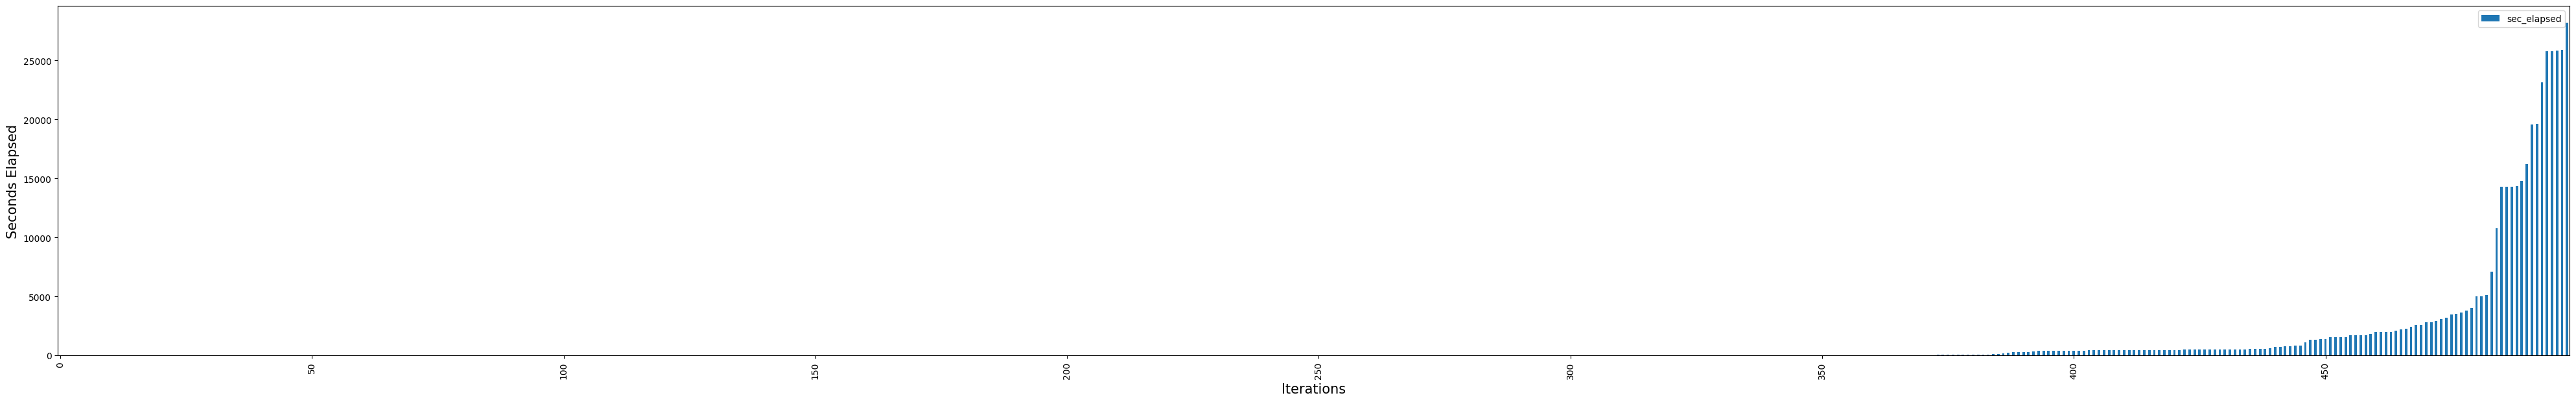

In [150]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

contract_data = {'sec_elapsed': []}

for i in range(1, 500):
    with open('./edg_finance_results_time_stamped/traces/' + str(i) + '.json') as f:
        target_contracts_set = set(target_contracts)
        consumer_contracts_set = set(consumer_contracts)
        data = json.load(f)["data"]
        total_calls = len(data)
        useful_calls = 0
        index = 0
        while index < total_calls - 1:
            sec_elapsed = data[index][1]["sec_elapsed"]
            if len(target_contracts_set) == 0:
                useful_calls = total_calls - index
                break
            index += 1
        contract_data['sec_elapsed'].append(sec_elapsed)

df = pd.DataFrame(data = contract_data)
ax = df.plot.bar(stacked=True, figsize=(50, 7))
loc = plticker.MultipleLocator(base = 50) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xlabel("Iterations", fontsize=15)
plt.ylabel("Seconds Elapsed", fontsize=15)
plt.show()

             useful_calls  other_calls
sec_elapsed                           
0                      37          522
1                       0          316
2                      59           99
3                     131          682
4                       0          161
...                   ...          ...
25793                 475           15
25794                 547           15
25873                 514           15
25900                 514           15
28212                 530           15

[149 rows x 2 columns]


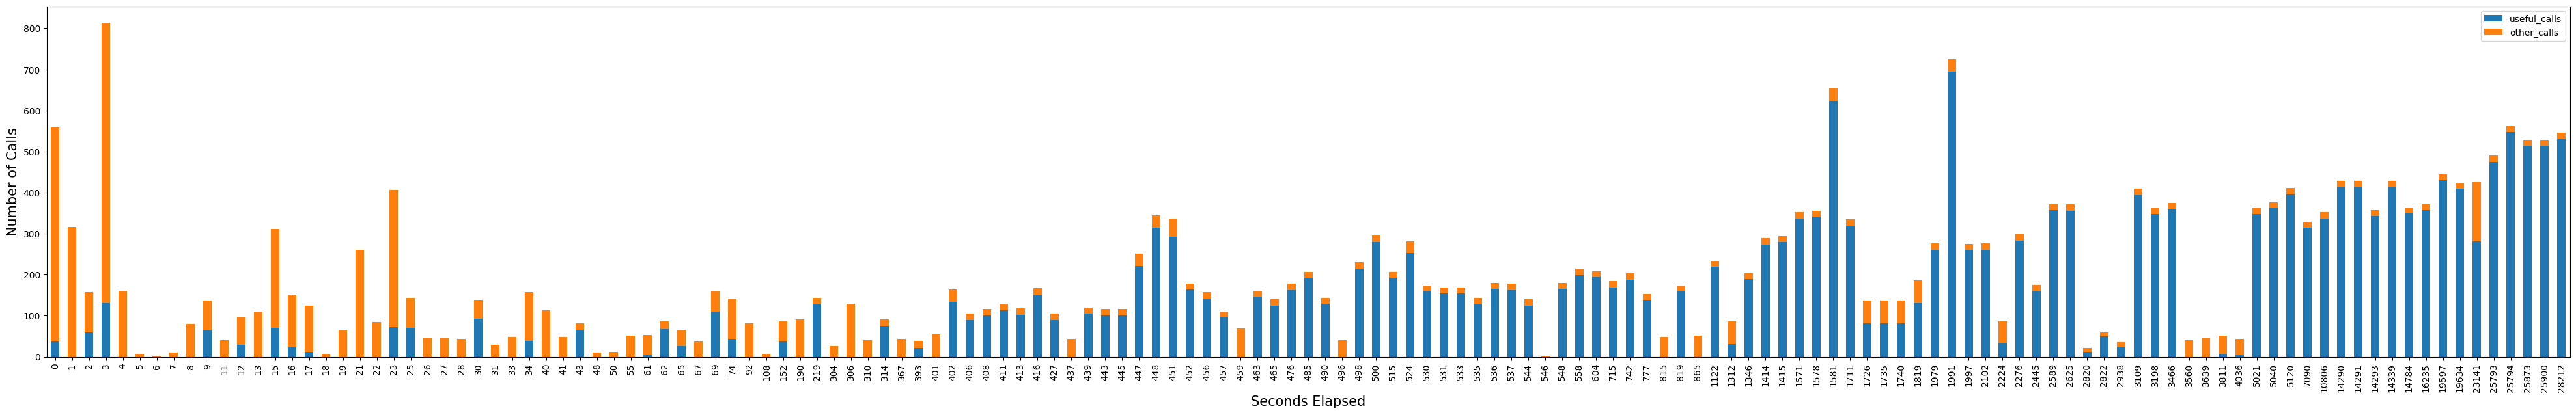

In [105]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

contract_data = {'sec_elapsed': [], 'useful_calls':[], 'other_calls':[]}


for i in range(1, 500):
    with open('./edg_finance_results_time_stamped/traces/' + str(i) + '.json') as f:
        target_contracts_set = set(target_contracts)
        consumer_contracts_set = set(consumer_contracts)
        data = json.load(f)["data"]
        total_calls = len(data)
        useful_calls = 0
        sec_elapsed = 0
        index = 0
        while index < total_calls - 1:
            current_call = data[index][1]["contract"]
            sec_elapsed = data[index][1]["sec_elapsed"]
            #print(current_call)
            #print(target_contracts_set)
            if current_call in target_contracts_set:
                target_contracts_set.remove(current_call)
            if len(target_contracts_set) == 0:
                useful_calls = total_calls - index
                break
            index += 1
        contract_data['sec_elapsed'].append(sec_elapsed)
        contract_data['useful_calls'].append(useful_calls)
        contract_data['other_calls'].append(total_calls - useful_calls)

df = pd.DataFrame(data = contract_data)
df = df.groupby(['sec_elapsed']).sum()
print(df)
ax = df.plot.bar(stacked=True, figsize=(50, 7))
#loc = plticker.MultipleLocator(base = 10, offset = 0) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)
plt.xlabel("Seconds Elapsed", fontsize=15)
plt.ylabel("Number of Calls", fontsize=15)
plt.show()

In [11]:
# search target is from work_dir/vulnerabilities/0_replayable
attack_trace_path = "./work_dir/vulnerabilities/0_replayable"
attack_traces = []
with open(attack_trace_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        data = json.loads(line)
        attack_traces.append(data)

state_traces = None
most_common_path, most_common_length = None, 0
for file_path in tqdm(glob.glob("./work_dir/corpus/*_state_corpus_origin")):
    with open(file_path) as f:
        data = json.load(f)
        state_trace = data['new_trace']

        set1 = set(json.dumps(item, sort_keys=True) for item in attack_traces)
        set2 = set(json.dumps(item, sort_keys=True) for item in attack_traces)
        
        common_elements = set1.intersection(set2)
        if len(common_elements) >= most_common_length:
            most_common_length = len(common_elements)
            most_common_path = file_path


100%|█████████████████████████████████████████████████████████████████| 575/575 [00:00<00:00, 1303.15it/s]


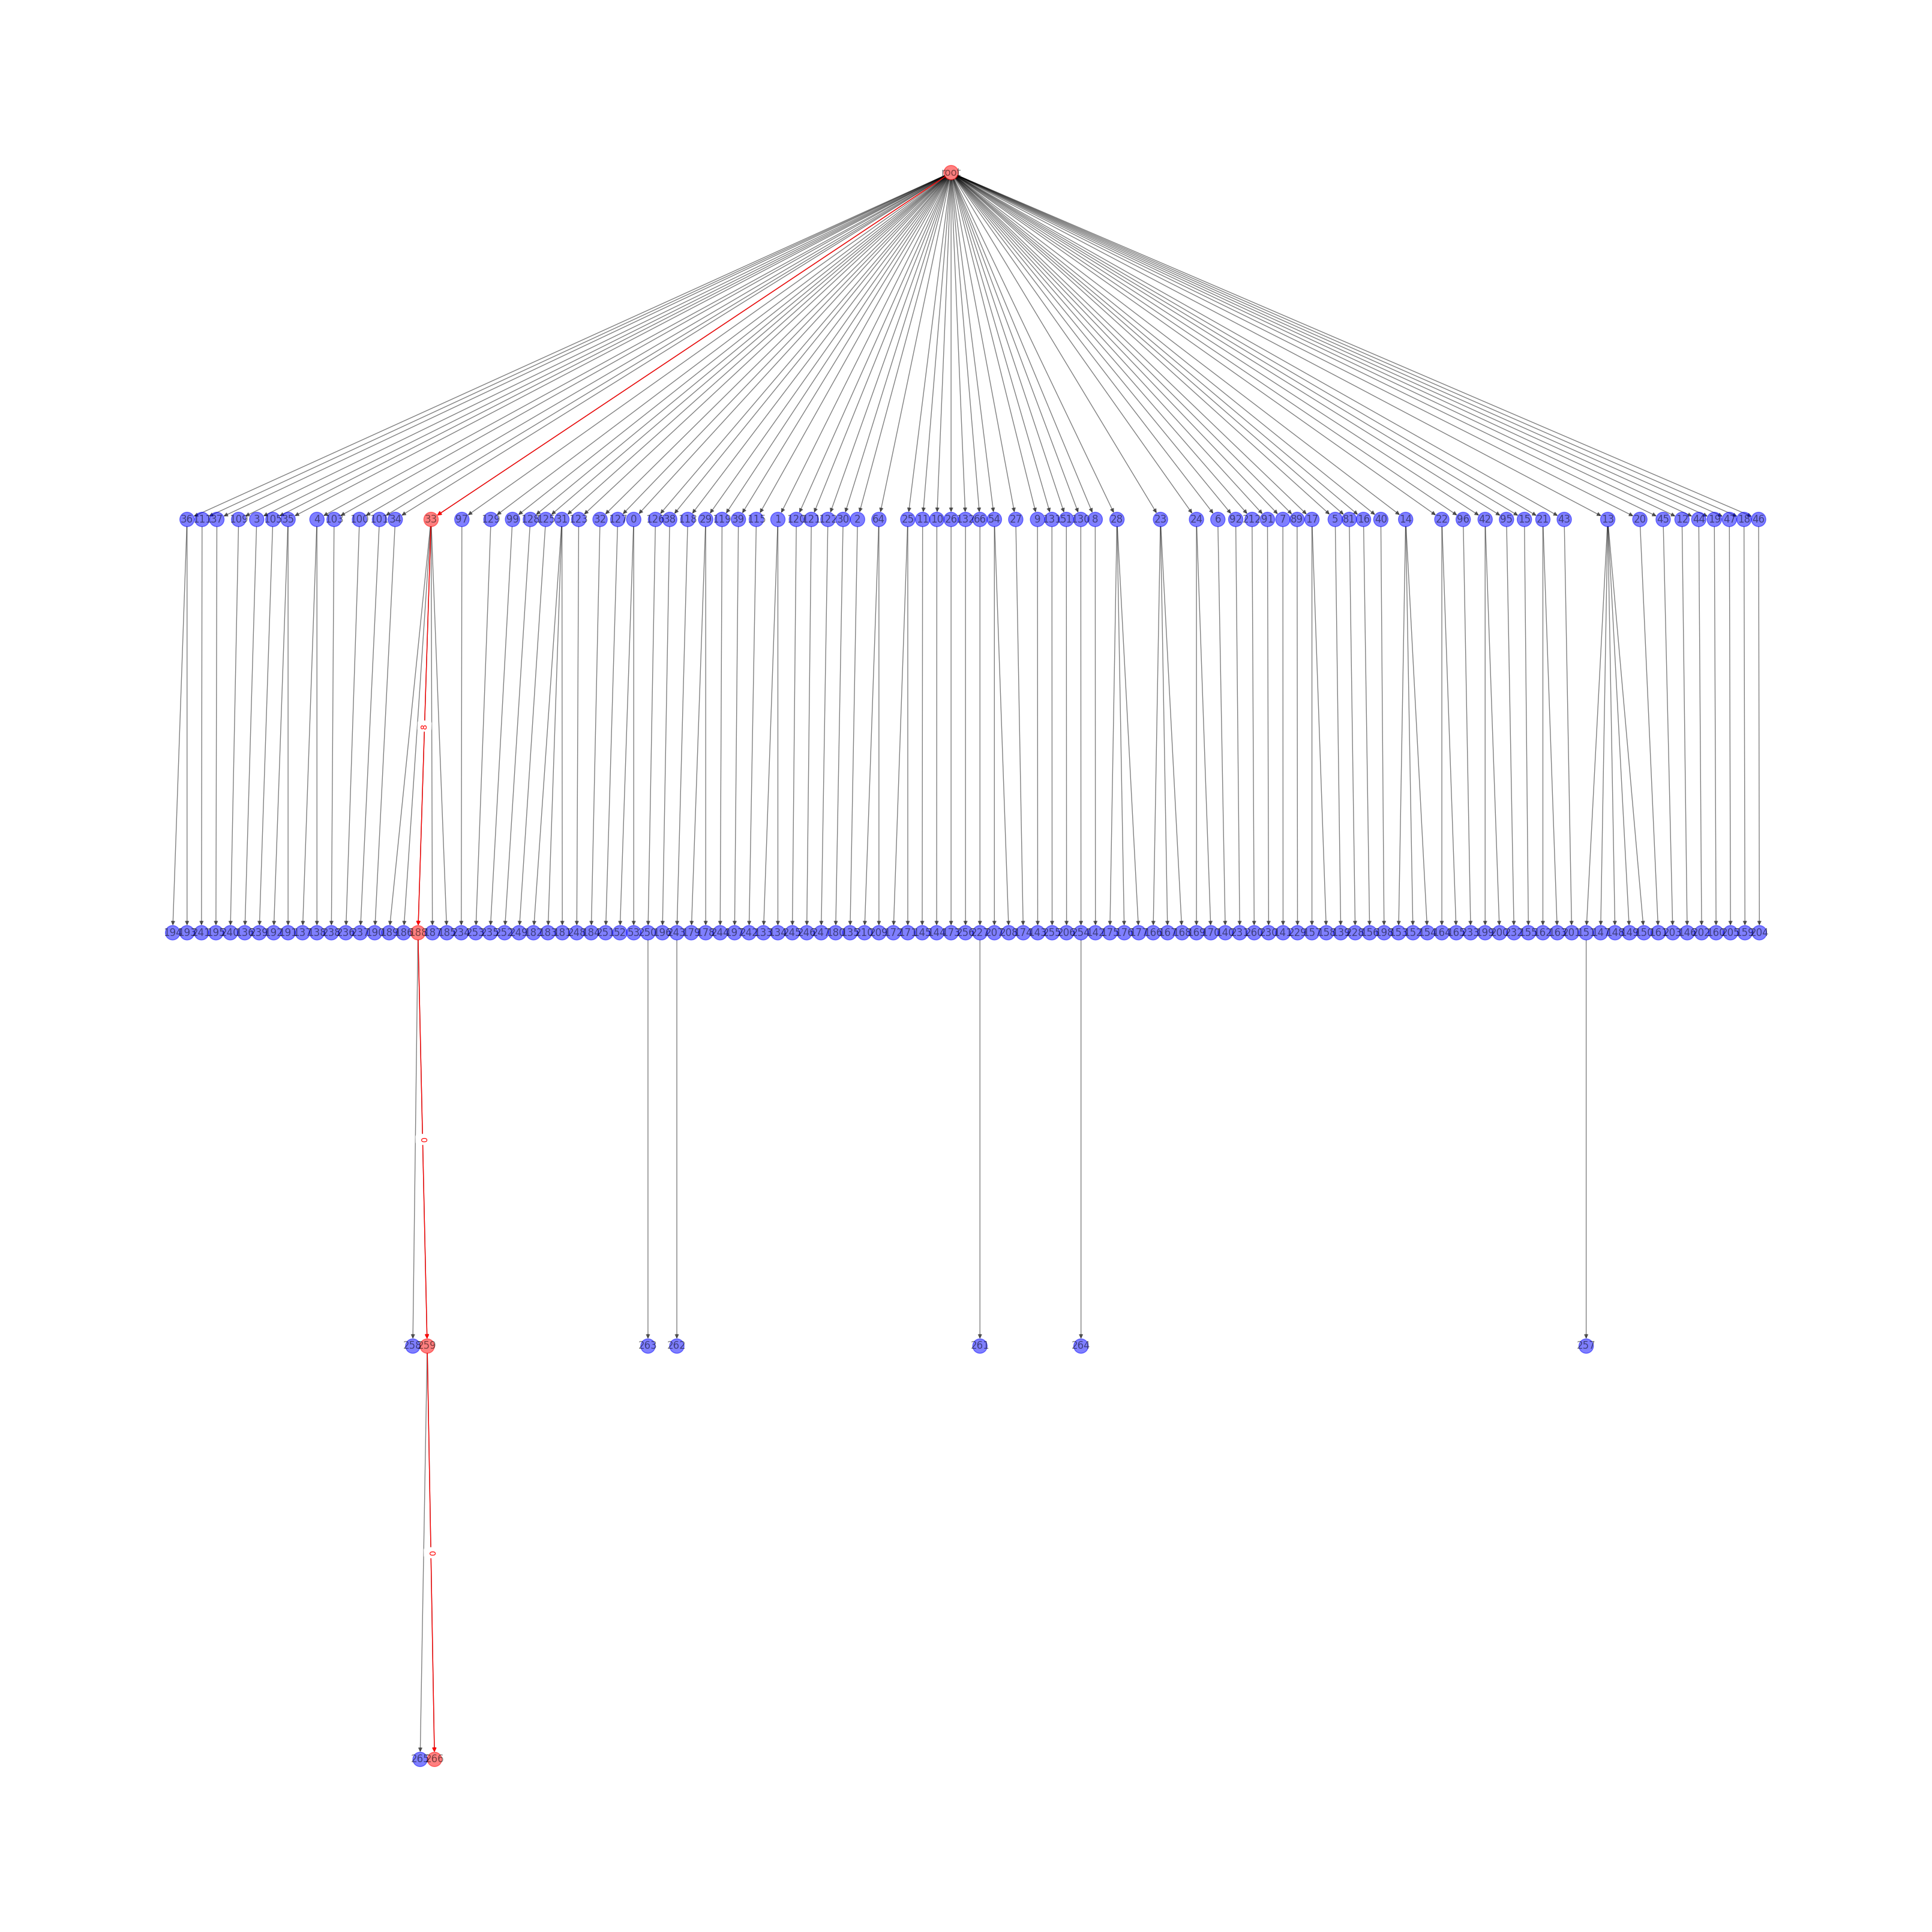

In [42]:
import json
import glob
import networkx as nx
import matplotlib.pyplot as plt

G_input = nx.DiGraph()
exploit_input_id = 266
input_corpus = []

# Add nodes / edges of input type
for file_path in glob.glob("./work_dir/corpus/*_input_corpus_origin"):
    with open(file_path) as f:
        data = json.load(f)
        new_input_id = data["new_input_id"]
        from_input_id = data["from_input_id"]
        state_mutated = data["state_mutated"]
        from_state_id = data["from_state_id"]
        new_input_trace = data["new_trace"]

        input_corpus.append(data)
        G_input.add_edge(str(from_input_id), str(new_input_id))
        G_input[str(from_input_id)][str(new_input_id)]['label'] = str(from_state_id)

virtual_root = "root"
root_nodes = []
# Iterate over the nodes in the forest
for node in G_input.nodes():
    # Check if the current node has any incoming edges
    if G_input.in_degree(node) == 0:
        root_nodes.append(node)
        
[G_input.add_edge(virtual_root, node) for node in root_nodes]

shortest_path = nx.shortest_path(G_input, source="root", target=str(exploit_input_id))
shortest_path_edges = list(nx.utils.pairwise(shortest_path))

node_colors = ['red' if node in shortest_path else 'blue' for node in G_input.nodes()]
# v this does not work :(
#node_label = [True if node in shortest_path else False for node in G.nodes()]

plt.figure(figsize=(32,32))
pos = nx.nx_agraph.graphviz_layout(G_input, prog='dot')
nx.draw(G_input, pos, with_labels=True, alpha=0.5, node_color=node_colors)
nx.draw_networkx_edges(G_input, pos=pos, edgelist=shortest_path_edges, edge_color='red')
#nx.draw_networkx_nodes(G, pos, with_labels=True, nodelist=shortest_path)

edge_labels = {(u, v): G_input[u][v]['label'] for u, v in shortest_path_edges[1:]}
nx.draw_networkx_edge_labels(G_input, pos, edge_labels=edge_labels, label_pos=0.5, font_color='red')

plt.show()

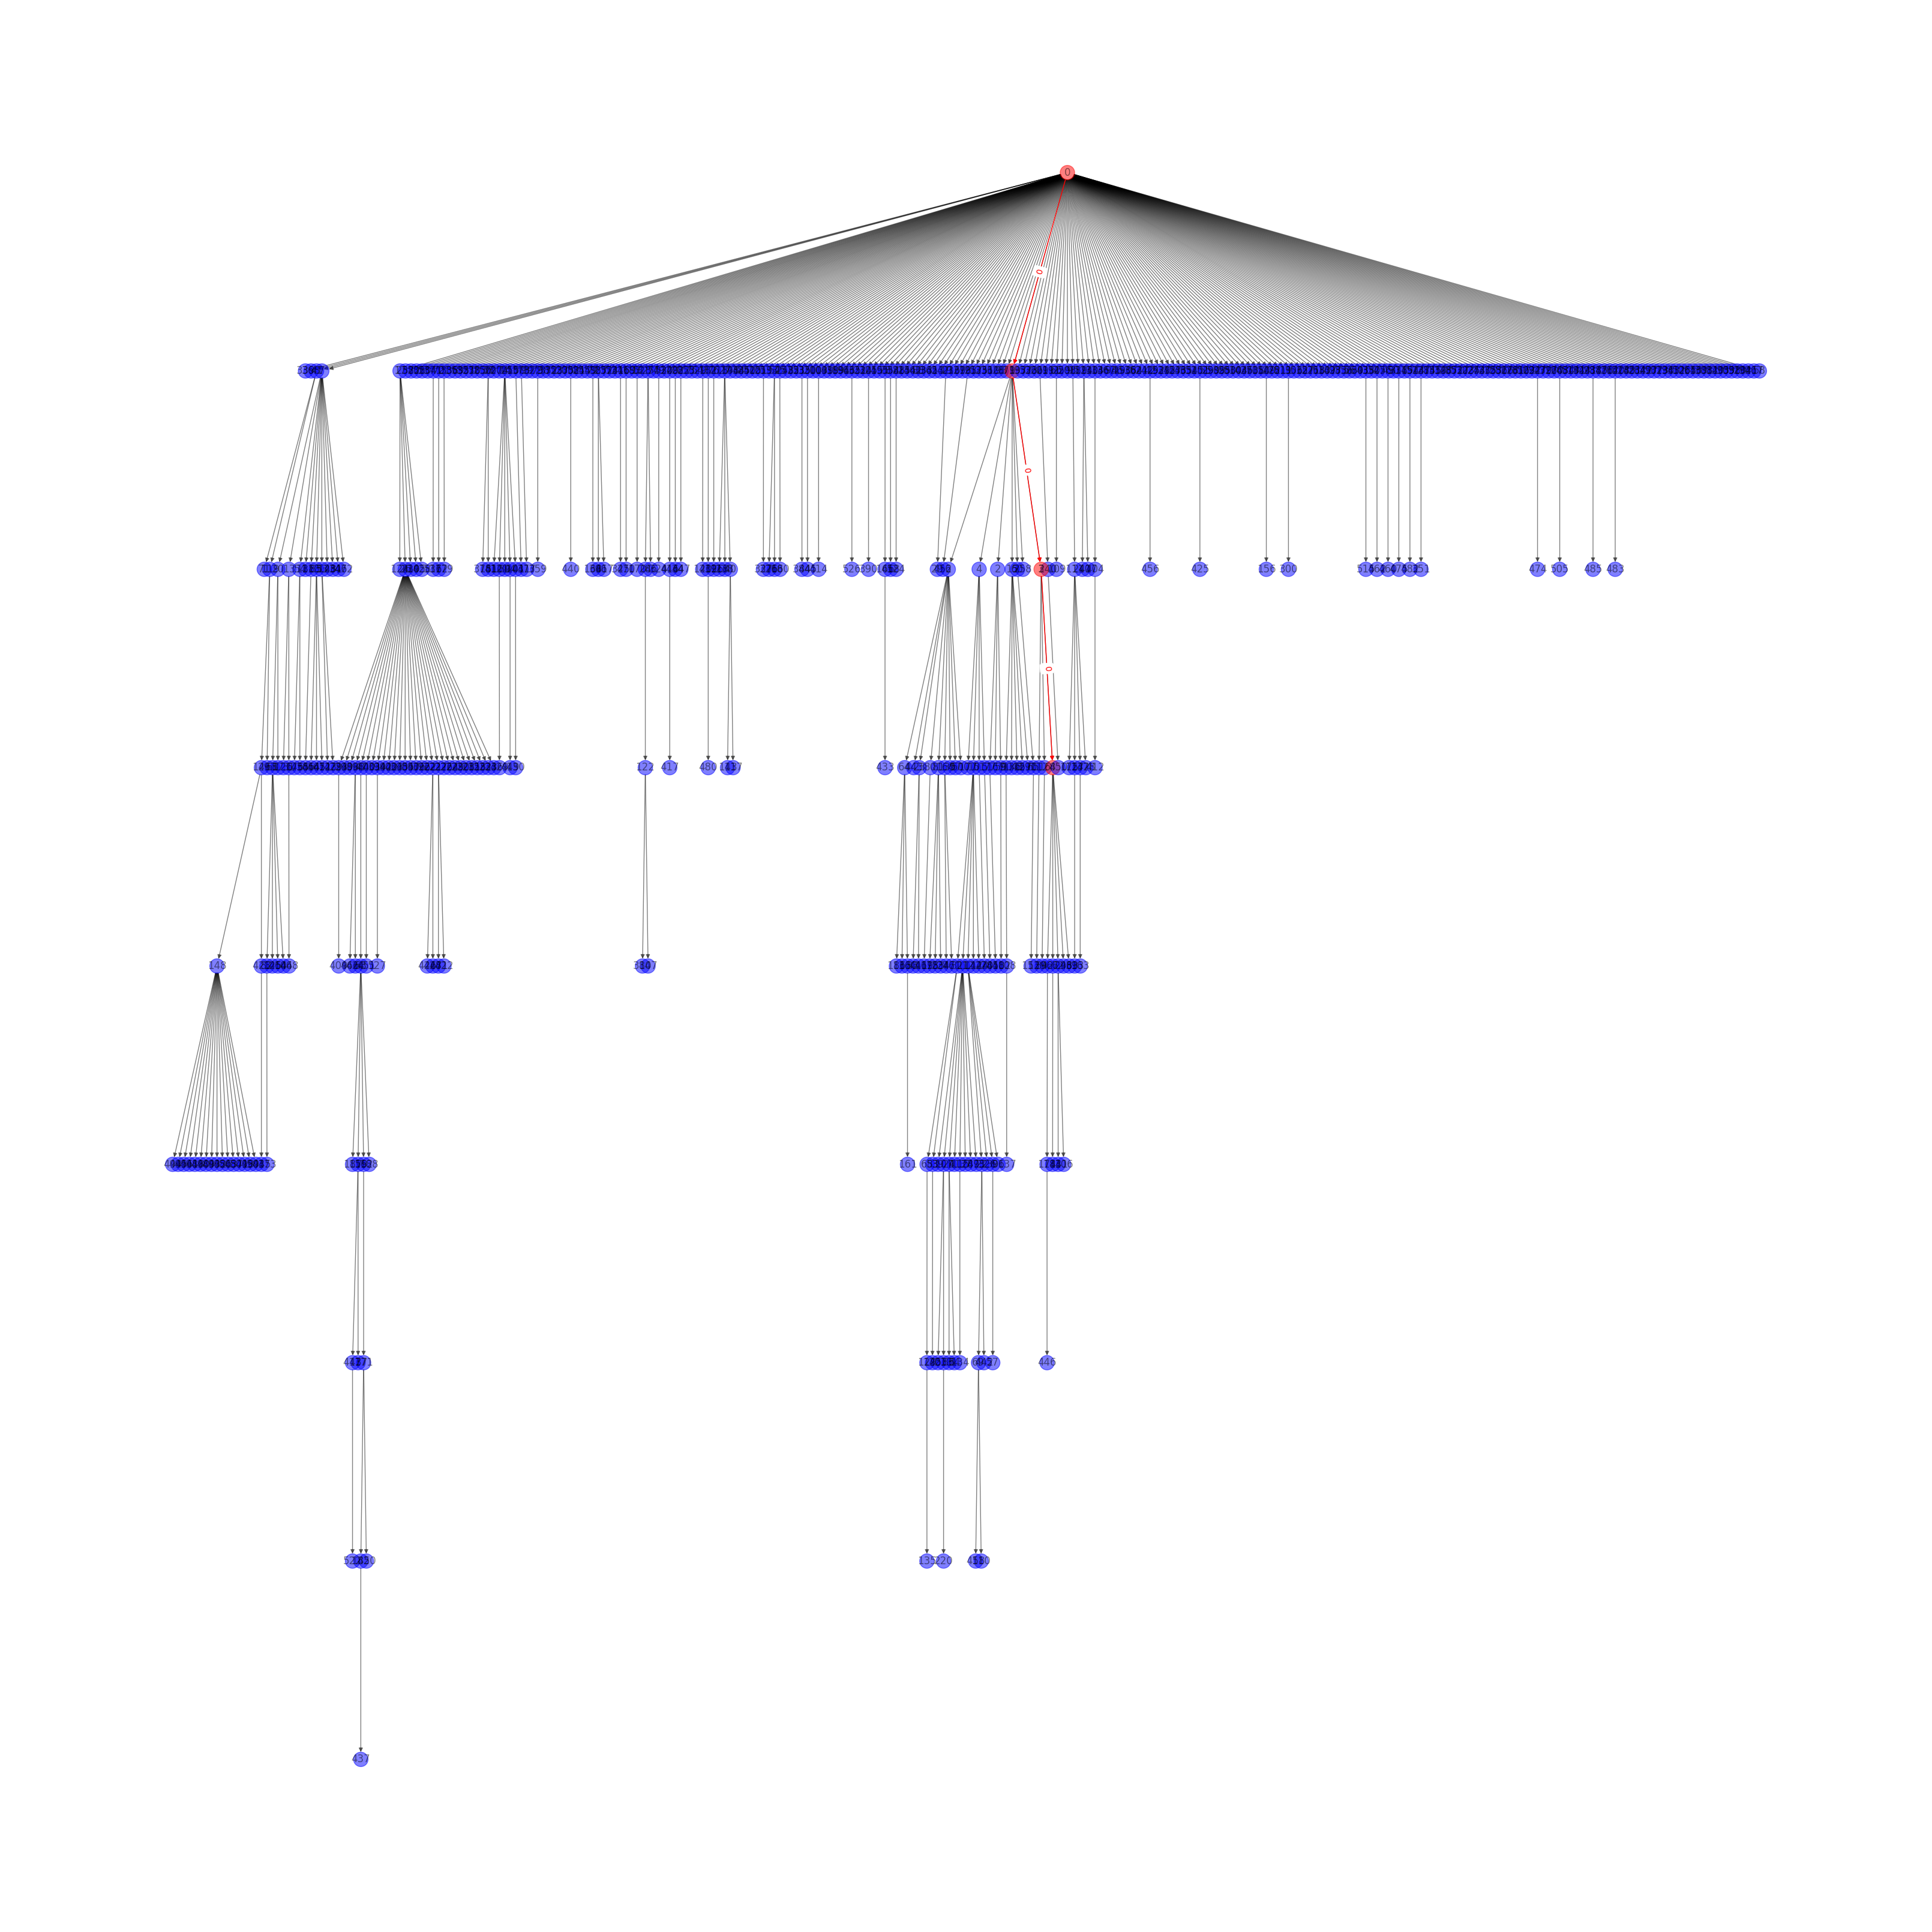

In [45]:
## seed input => input
## (seed + fl)
##            => state
## (state + input) => input

G_state = nx.DiGraph()
exploit_state_id = 8

# Add nodes / edges of input type
for file_path in glob.glob("./work_dir/corpus/*_state_corpus_origin"):
    with open(file_path) as f:
        data = json.load(f)
        new_state_id = data["new_state_id"]
        from_state_id = data["from_state_id"]
        state_mutated = data["state_mutated"]
        from_input_id = data["from_input_id"]
        new_input_trace = data["new_trace"]

        input_corpus.append(data)
        G_state.add_edge(str(from_state_id), str(new_state_id))
        G_state[str(from_state_id)][str(new_state_id)]['label'] = str(from_input_id)

shortest_path = nx.shortest_path(G_state, source="0", target=str(exploit_state_id))
shortest_path_edges = list(nx.utils.pairwise(shortest_path))

node_colors = ['red' if node in shortest_path else 'blue' for node in G_state.nodes()]

plt.figure(figsize=(32,32))
pos = nx.nx_agraph.graphviz_layout(G_state, prog='dot')
nx.draw(G_state, pos, with_labels=True, alpha=0.5, node_color=node_colors)
nx.draw_networkx_edges(G_state, pos=pos, edgelist=shortest_path_edges, edge_color='red')

edge_labels = {(u, v): G_state[u][v]['label'] for u, v in shortest_path_edges}
nx.draw_networkx_edge_labels(G_state, pos, edge_labels=edge_labels, label_pos=0.5, font_color='red')

plt.show()